In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
data=pd.read_csv('Salary_dataset.csv')
print(data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


<Axes: >

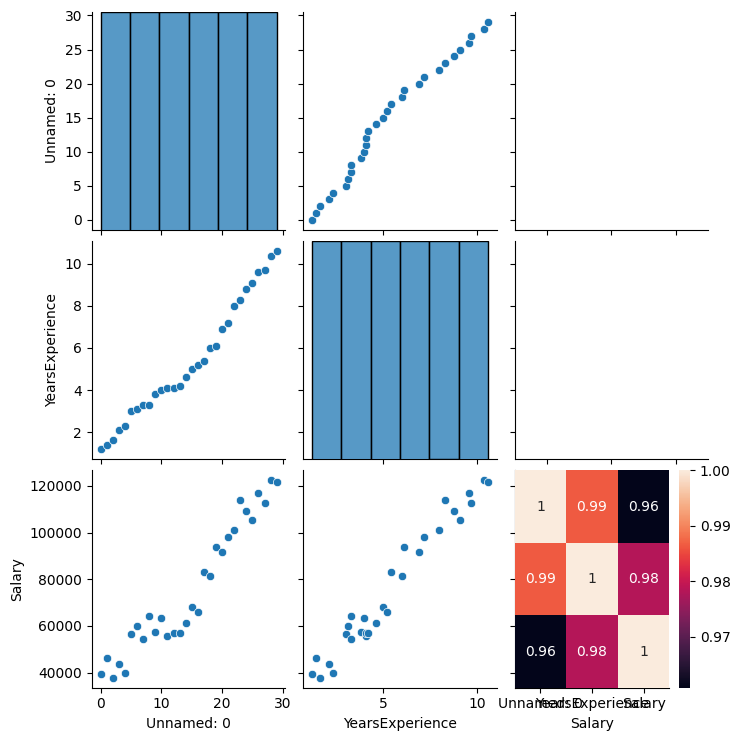

In [73]:
#Data Preprocessing
data.isnull().sum()
data.describe()
data.info()

#Data Visualization
sns.pairplot(data)
sns.heatmap(data.corr(),annot=True)



In [74]:
split=0.8

train_x=data['YearsExperience'][:int(len(data)*split)]
train_y=data['Salary'][:int(len(data)*split)]

test_x=data['YearsExperience'][int(len(data)*split):]
test_y=data['Salary'][int(len(data)*split):]


In [75]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(24,)
(24,)
(6,)
(6,)


In [76]:
def hypothesis(x,w):
    return w[0]+w[1]*x

In [77]:
def loss(x,y,w):
    return np.mean((hypothesis(x,w)-y)**2)

In [78]:
def gradient(x,y,w):
    dw0=np.mean(hypothesis(x,w)-y)
    dw1=np.mean((hypothesis(x,w)-y)*x)
    return [dw0,dw1]

In [79]:
def gradient_descent(x,y):
    w=[0,0]
    lr=0.03
    epochs=4000
    loss_values=[]
    for i in range(epochs):
        loss_values.append(loss(x,y,w))
        w[0]-=lr*gradient(x,y,w)[0]
        w[1]-=lr*gradient(x,y,w)[1]
        print(loss(x,y,w))
    return w,loss_values


In [80]:
w,loss=gradient_descent(train_x,train_y)

558485748.6965495
146232164.3106877
105443224.6033119
100746500.90126131
99646102.7836793
98935076.28906733
98279079.4503541
97637858.14045109
97004996.01802327
96379049.99291702
95759586.32655519
95146432.5825812
94539492.50820465
93938693.3200196
93343969.86383283
92755259.76576118
92172501.93640809
91595636.10562181
91024602.67477803
90459342.6669945
89899797.70758522
89345910.01388325
88797622.38799421
88254878.21049494
87717621.434465
87185796.5796615
86659348.72677816
86138223.51177062
85622367.12024127
85111726.28188181
84606248.26497205
84105880.87093462
83610572.42894448
83120271.7905933
82634928.32460737
82154491.9116192
81678912.93899202
81208142.29569624
80742131.36723824
80280832.03063989
79824196.64946935
79372178.06892169
78924729.61094941
78481805.0694424
78043358.70545605
77609345.24248834
77179719.86180423
76754438.19780727
76333456.33345836
75916730.79574046
75504218.55116944
75095877.00135006
74691663.97857723
74291537.7414812
73895456.97071747
73503380.76469965
731


56408223.004856616
56192951.04133731
55979855.579631545
55768914.61427214
55560106.36227753
55353409.260902435
55148801.965411276
54946263.3468738
54745772.48998332
54547308.69089681
54350851.45509698
54156380.495275736
53963875.72923943
53773317.27783483
53584685.46289649
53397960.805214494
53213124.02252302
53030156.02750906
52849037.92584148
52669751.01421976
52492276.77844268
52316596.89149631
52142693.211661674
51970547.78064101
51800142.821703635
51631460.73784998
51464484.10999451
51299195.69516691
51135578.42473153
50973615.40262472
50813289.90361001
50654585.371551074
50497485.41770198
50341973.819014765
50188034.51646421
50035651.61338949
49884809.37385258
49735492.22101319
49587684.73552034
49441371.653920025
49296537.86707899
49153168.4186245
49011248.50339983
48870763.465935476
48731698.79893565
48594040.141780205
48457773.27904174
48322884.1390175
48189358.79227638
48057183.450220466
47926344.46366107
47796828.32140931
47668621.64888082
47541711.20671466
47416083.8894061

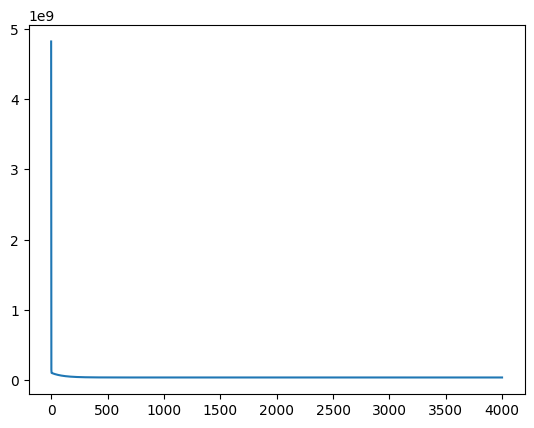

In [81]:
plt.plot(loss)

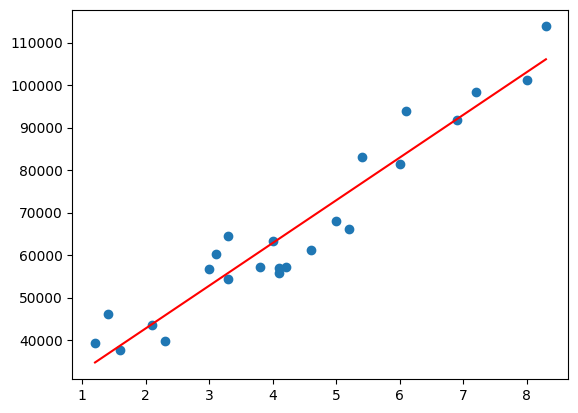

In [82]:
#plotting the data
plt.scatter(train_x,train_y)
plt.plot(train_x,hypothesis(train_x,w),color='red')
plt.show()

24    111120.088350
25    114135.924202
26    119162.317289
27    120167.595906
28    127204.546227
29    129215.103462
Name: YearsExperience, dtype: float64


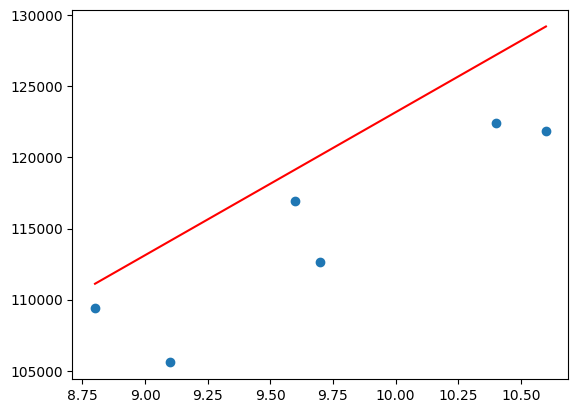

In [83]:
y_pred=hypothesis(test_x,w)
print(y_pred)

plt.scatter(test_x,test_y)
plt.plot(test_x,y_pred,color='red')
plt.show()

In [84]:
#Calculating the accuracy
def accuracy(y_pred,y):
    return 1-np.mean((y_pred-y)**2)/np.mean((y-np.mean(y))**2)

print(accuracy(y_pred,test_y))

0.07028895227992116
